# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰📈

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-09-21 14:58:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Connecting to 127.0.0.1:12334... connected.
Proxy request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K   621KB/s    in 0.3s    

2024-09-21 14:58:49 (621 KB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [17]:
import pandas as pd
df= pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
               parse_dates=['Date'],
               index_col=['Date'])

In [21]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [22]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [31]:
df.dtypes

Currency                object
Closing Price (USD)    float64
24h Open (USD)         float64
24h High (USD)         float64
24h Low (USD)          float64
dtype: object

In [28]:
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

>🔑 **Note**: The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [37]:
bitcoin_prices= pd.DataFrame(df['Closing Price (USD)'])

In [42]:
bitcoin_prices= bitcoin_prices.rename(columns={'Closing Price (USD)':'Price'})

In [43]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


(15979.0, 18765.0)
(15879.0, 18865.0)


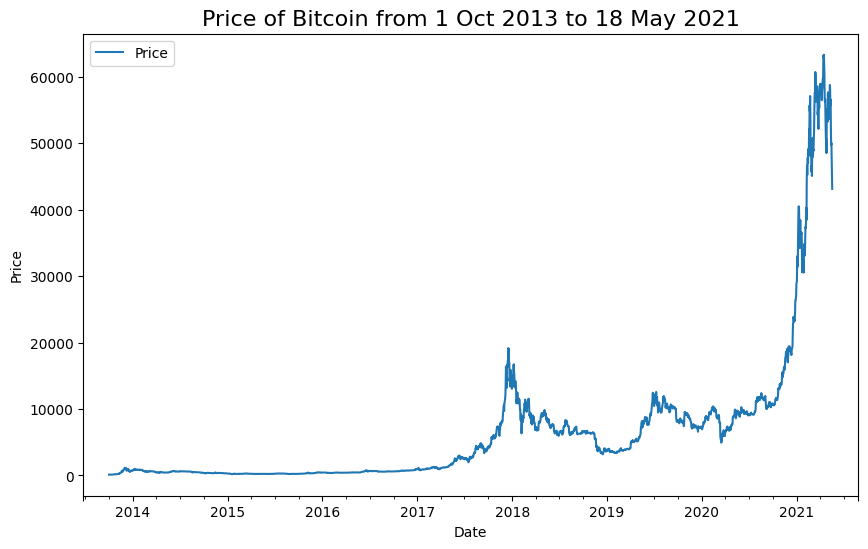

In [162]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,6))
plt.ylabel('Price')
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
print(plt.xlim())
plt.xlim(plt.xlim()[0]-100, plt.xlim()[1]+100)
print(plt.xlim())

 ## Importing time series data with Python's CSV module

In [105]:
import csv
from datetime import datetime

time_steps=[]
btc_price=[]
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader= csv.reader(f, delimiter=',')
    next(csv_reader)  # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        #print(line)
        time_steps.append(datetime.strptime(line[1],'%Y-%m-%d')) # get the dates as dates (not strings)
        btc_price.append(float(line[2]))

In [129]:
time_steps[:5]

[datetime.datetime(2013, 10, 1, 0, 0),
 datetime.datetime(2013, 10, 2, 0, 0),
 datetime.datetime(2013, 10, 3, 0, 0),
 datetime.datetime(2013, 10, 4, 0, 0),
 datetime.datetime(2013, 10, 5, 0, 0)]

In [107]:
btc_price[:5]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866]

(15839.7, 18904.3)


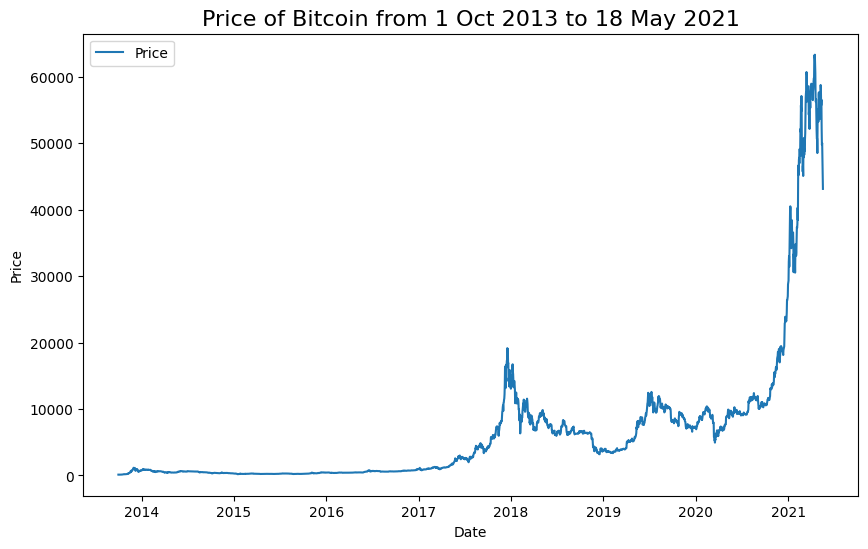

In [142]:
plt.figure(figsize=(10,6))
plt.plot(time_steps, btc_price, label='Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend()
print(plt.xlim())

## Format data part 1: Create train and test sets of our time series data


### Creating train and test sets with time series data (the wrong way)

In [182]:
# Get bitcoin date and prices array
timesteps= bitcoin_prices.index.to_numpy()
prices= bitcoin_prices['Price'].to_numpy()

In [183]:
timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [212]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(timesteps,
                                                  prices,
                                                  test_size=0.2,
                                                  shuffle=True)

X_train.shape, X_test.shape

((2229,), (558,))

In [213]:
X_train[:10]

array(['2020-09-16T00:00:00.000000000', '2018-02-12T00:00:00.000000000',
       '2014-05-23T00:00:00.000000000', '2014-01-11T00:00:00.000000000',
       '2019-06-02T00:00:00.000000000', '2014-12-02T00:00:00.000000000',
       '2015-12-30T00:00:00.000000000', '2016-01-07T00:00:00.000000000',
       '2020-10-15T00:00:00.000000000', '2020-01-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

Text(0, 0.5, 'BTC Price')

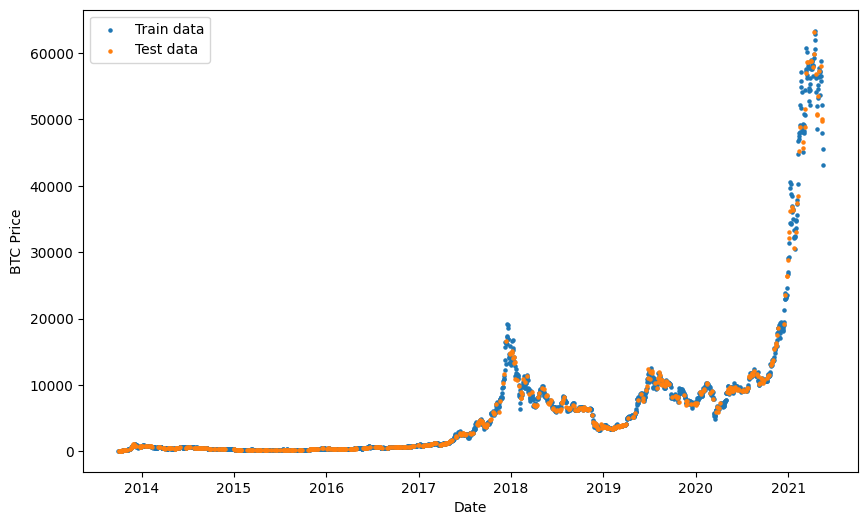

In [214]:
# Plot wrong train and test splits
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train, s=5, label='Train data')
plt.scatter(X_test,y_test, s=5, label='Test data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('BTC Price')

### Create train & test sets for time series (the right way)


In [215]:
# Right way to make train/test sets for time series data
split_size= int(0.8 * len(timesteps))

X_train, y_train= timesteps[: split_size], prices[: split_size]
X_test, y_test= timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape

((2229,), (558,))

Text(0, 0.5, 'BTC Price')

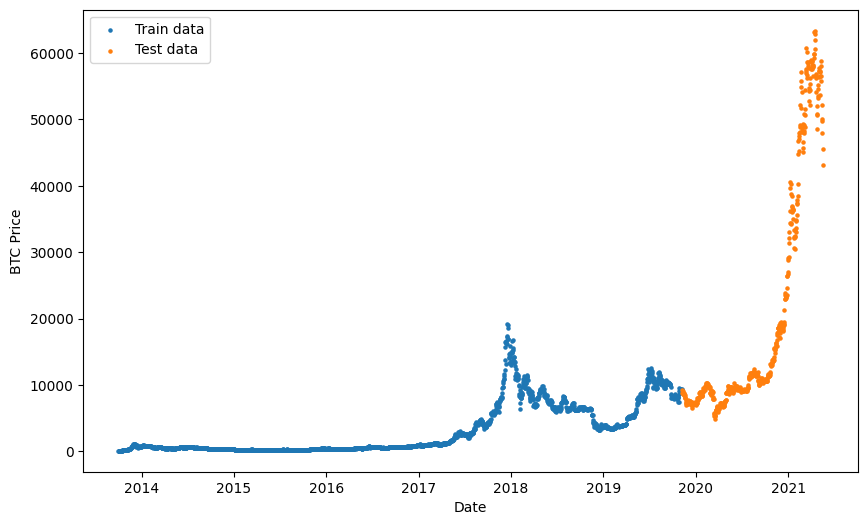

In [216]:
# Plot right train and test splits
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train, s=5, label='Train data')
plt.scatter(X_test,y_test, s=5, label='Test data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('BTC Price')

## Create a plotting function



In [228]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend()
    plt.grid()

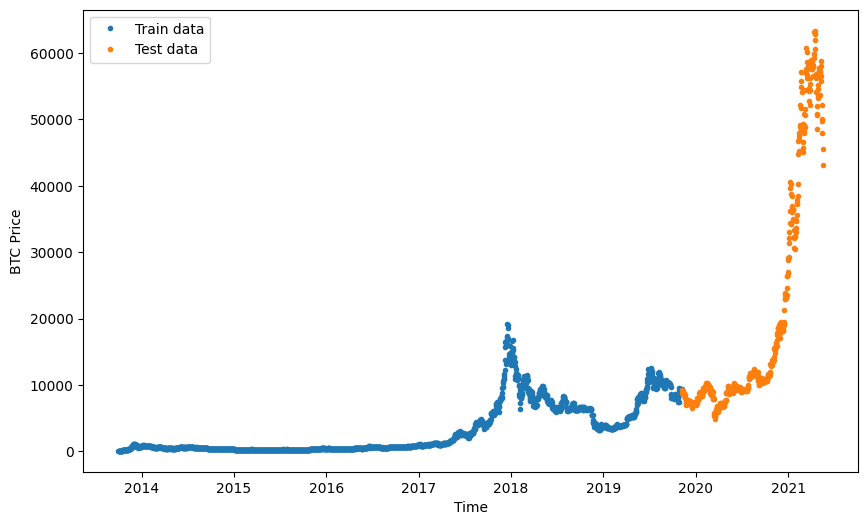

In [235]:
plt.figure(figsize=(10,6))
plot_time_series(X_train, y_train, label='Train data', )
plot_time_series(X_test, y_test, label='Test data')

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:

* 0 Naive model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)
The formula looks like this:

$$ \hat y_t = y_{t-1} $$

In English:

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [242]:
# Create a naive forecast
naive_forecast= y_test[:-1]



In [243]:
y_test.shape, naive_forecast.shape

((558,), (557,))

In [244]:
y_test[:5], naive_forecast[:5]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917]))

In [245]:
y_test[-5:], naive_forecast[-5:]

(array([49764.1320816 , 50032.69313676, 47885.62525472, 45604.61575361,
        43144.47129086]),
 array([52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361]))

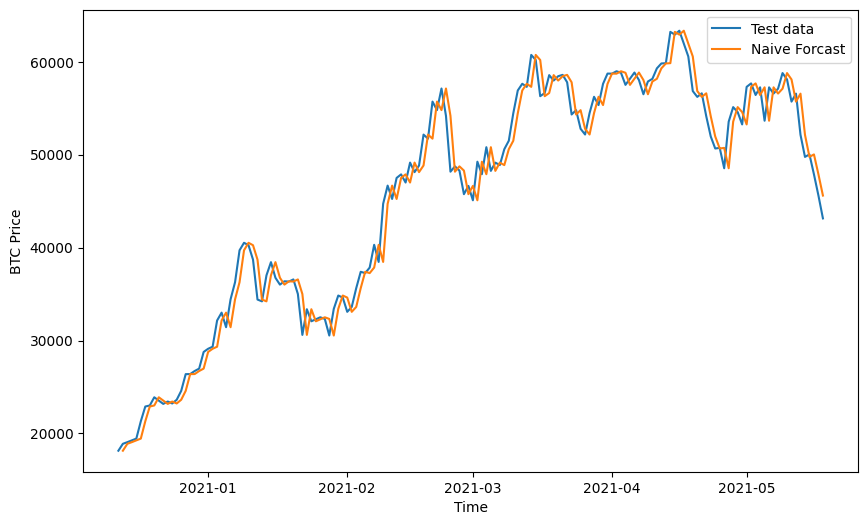

In [264]:
# Plot naive forecast
plt.figure(figsize=(10,6))
#plot_time_series(X_train, y_train, label='Train data')
plot_time_series(X_test, y_test, label='Test data', format='-', start=400)
plot_time_series(X_test[1:], naive_forecast, label='Naive Forcast', format='-', start=400)

## Evaluating a time series model
Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

>📖 **Resource**: For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)

In [266]:
import tensorflow as tf

2024-09-22 14:18:31.076330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 14:18:31.324394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 14:18:31.407397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 14:18:31.872821: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 14:18:33.607708: W tensorflow/compiler/tf2

In [281]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    
    mae= tf.reduce_mean(tf.abs(y_true-y_pred))
    
    # Fine MAE of naive forecast (no seasonality)
    mae_naive_no_season= tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae/mae_naive_no_season

In [282]:
mean_absolute_scaled_error(y_true= y_test[1:],
                          y_pred= naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [295]:
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as mase

In [301]:
mase(y_true= y_test[1:],
    y_pred= naive_forecast,
    y_train= y_test[1:])


0.9995699939182626

In [302]:
y_test[0].dtype

dtype('float64')

In [312]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true= tf.cast(y_true, dtype=tf.float32)
    y_pred= tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various evaluation metrics 
    mae= tf.metrics.mae(y_true, y_pred)
    mse= tf.metrics.mse(y_true, y_pred)
    rmse= tf.sqrt(mse)
    mape= tf.metrics.mape(y_true, y_pred)
    mase= mean_absolute_scaled_error(y_true, y_pred)
    
    return {'mae':mae.numpy(),
           'mse':mse.numpy(),
           'rmse':rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

In [315]:
naive_results= evaluate_preds(y_test[1:],
              naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Other models you can use for baselines and for actual forecasts
In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts



## Format data part 2: windoing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [317]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")


We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [370]:
# Setup global variable for window and horizon size
HORIZON=1 # predict next 1 day
WINDOW_SIZE=7 # use the past weak of Bitcoin data to make a prediction

In [366]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [367]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    E.g. if horizon=1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [368]:
tf.expand_dims(btc_price, axis=0)[:, :]

<tf.Tensor: shape=(1, 2787), dtype=float32, numpy=
array([[  123.65499,   125.455  ,   108.58483, ..., 47885.625  ,
        45604.617  , 43144.473  ]], dtype=float32)>

In [369]:
tf.range(8), tf.range(8)+1, tf.range(1,9)

(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>,
 <tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>,
 <tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>)

In [351]:
tf.expand_dims(tf.range(1,9),0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [364]:
test_window, test_label= get_labelled_windows( tf.expand_dims(tf.range(1,9), axis=0) )
tf.squeeze(test_window).numpy(), tf.squeeze(test_label).numpy()

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32), 8)

Window: [0 1 2 3 4 5 6] -> Label: 7

We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon
>📖 Resource: The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [494]:
import numpy as np

# Create fnction to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    '''
    Turns a 1D array to a 2D array of sequential labelled windows of window_size with horizon size labels.
    '''
    # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
    window_step= np.expand_dims(np.arange(window_size+horizon), axis=0)
    #print(f'Window step:\n{window_step}')
    
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes= window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon -1)), axis=0).T
    #print(f'\nRange:\n{np.expand_dims(np.arange(len(x) - (window_size + horizon -1)), axis=0).T}')
    #print(f"\nWindow indexes:\n {window_indexes, window_indexes.shape}")
    
    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array= x[window_indexes]
    #print('\nWindowed array:\n',windowed_array,windowed_array.shape)
    
    # 4. Get the labelled windows
    windows, labels= get_labelled_windows(windowed_array)
    #print(f'\nWindows:\n{windows, windows.shape}\n\nLabels:\n{labels, labels.shape}')
    
    return windows, labels

In [468]:
a= np.array([[0,1,2,3]])
b= np.array(1)

In [469]:
a

array([[0, 1, 2, 3]])

In [470]:
a.T

array([[0],
       [1],
       [2],
       [3]])

In [471]:
a+b

array([[1, 2, 3, 4]])

In [472]:
a.T+b

array([[1],
       [2],
       [3],
       [4]])

In [473]:
prices, prices.shape

(array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]),
 (2787,))

In [493]:
make_windows(prices)

Window step:
[[0 1 2 3 4 5 6 7]]

Range:
[[   0]
 [   1]
 [   2]
 ...
 [2777]
 [2778]
 [2779]]

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))

Windowed array:
 [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.

In [495]:
prices[-1]

43144.4712908603

In [497]:
full_windows, full_labels= make_windows(prices)
full_windows.shape, full_labels.shape

((2780, 7), (2780, 1))

In [498]:
# View the first 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [500]:
# View the last 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}\n')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]

Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]

Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]



In [501]:
prices[-1]

43144.4712908603

>🔑 Note: There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array
```tf.keras.preprocessing.timeseries_dataset_from_array```


## Turning windows into training and test sets

In [510]:
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size= int(len(windows) * (1 - test_split))
    
    train_windows= windows[:split_size]
    test_windows= windows[split_size:]
    train_labels= labels[:split_size]
    test_labels= labels[split_size:]
    
    return train_windows, test_windows, train_labels, test_labels
    

In [511]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [515]:
len(full_windows) * 0.8, len(full_windows)* 0.2

(2224.0, 556.0)

In [519]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [521]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [533]:
train_labels[:-HORIZON-1].shape

(2222, 1)

In [535]:
y_train[WINDOW_SIZE:].shape

(2222,)

In [536]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])
     

True

## Make a modelling chcpoint

In [573]:
import os

def create_model_checkpoint(model_name,save_path='model_checkpoints'):
    return tf.keras.callbacks.ModelCheckpoint(filepath= os.path.join(save_path, model_name + '.keras'),
                                             save_best_only=True,
                                             verbose=0)

## Model 1: Dnse model (window= 7, horizon= 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* Hyperparameters = values a machine learning practitioner (you!) can adjust themselves
* Parameters = values a model learns on its own


In [580]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Construct model
model_1= tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# Compile model
model_1.compile(loss= 'mae',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['mae', 'mse'])

# Fit model
history_model_1= model_1.fit(train_windows,
                            train_labels,
                            epochs=100,
                            verbose=1,
                            batch_size=128,
                            validation_data=(test_windows, test_labels),
                            callbacks=[create_model_checkpoint(model_name= model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2882.2224 - mae: 2882.2224 - mse: 21428466.0000 - val_loss: 1804.6740 - val_mae: 1804.6740 - val_mse: 7685484.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 361.7867 - mae: 361.7867 - mse: 506615.2188 - val_loss: 1483.8523 - val_mae: 1483.8523 - val_mse: 5507543.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 251.2245 - mae: 251.2245 - mse: 265671.9688 - val_loss: 1044.6289 - val_mae: 1044.6289 - val_mse: 3689054.7500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 184.2708 - mae: 184.2708 - mse: 171652.9375 - val_loss: 999.8172 - val_mae: 999.8172 - val_mse: 3321562.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.9501 - mae: 172.9501 - mse: 158954.7344 - val_loss: 1008.8113 - val_mae: 1008.8113 - val_mse: 3222587.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168.9278 - mae: 168.9278 - mse: 151703.2656 - val_loss: 995.6524 - val_mae: 995.6524 - v

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.4085 - mae: 111.4085 - mse: 76008.0000 - val_loss: 597.2898 - val_mae: 597.2898 - val_mse: 1266567.3750
Epoch 42/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111.5739 - mae: 111.5739 - mse: 76152.8438 - val_loss: 596.7870 - val_mae: 596.7870 - val_mse: 1263101.3750
Epoch 43/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.1551 - mae: 111.1551 - mse: 75869.5547 - val_loss: 600.6079 - val_mae: 600.6079 - val_mse: 1270986.7500
Epoch 44/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111.4451 - mae: 111.4451 - mse: 75947.1719 - val_loss: 604.0300 - val_mae: 604.0300 - val_mse: 1276977.2500
Epoch 45/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.0655 - mae: 111.0655 - mse: 75931.7344 - val_loss: 593.4161 - val_mae: 593.4161 - val_mse: 1250682.7500
Epoch 46/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.2410 - mae: 110.2410 - mse: 75017.5547 - val_loss: 584.5969 - val_mae: 584.5969 - val_mse: 1229917.2500
Epoch

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.9434 - mae: 107.9434 - mse: 71468.0391 - val_loss: 571.0529 - val_mae: 571.0529 - val_mse: 1175993.3750
Epoch 82/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.5499 - mae: 107.5499 - mse: 71492.5547 - val_loss: 569.7991 - val_mae: 569.7991 - val_mse: 1172180.0000
Epoch 83/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.9768 - mae: 106.9768 - mse: 71215.5625 - val_loss: 570.5125 - val_mae: 570.5125 - val_mse: 1172642.7500
Epoch 84/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 106.7592 - mae: 106.7592 - mse: 71066.9062 - val_loss: 569.7016 - val_mae: 569.7016 - val_mse: 1171589.2500
Epoch 85/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 107.0721 - mae: 107.0721 - mse: 71189.5781 - val_loss: 569.6561 - val_mae: 569.6561 - val_mse: 1171555.6250
Epoch 86/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 107.5652 - mae: 107.5652 - mse: 71370.5703 - val_loss: 569.2681 - val_mae: 569.2681 - val_mse: 1169636.8750
Epoch

In [581]:
len(train_windows)

2224

In [582]:
len(train_windows)/128

17.375

In [583]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.3407 - mae: 283.3407 - mse: 345378.3125


[569.3421630859375, 569.3421630859375, 1163660.5]

In [584]:
model_1= tf.keras.models.load_model('model_checkpoints/model_1_dense.keras')

In [585]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284.0374 - mae: 284.0374 - mse: 344668.3750 


[568.7463989257812, 568.7463989257812, 1164587.625]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [606]:
def make_pred(model, input_data):
    forecast=model.predict(input_data)
    return tf.squeeze(forecast)

In [607]:
model_1_preds=make_pred(model_1,test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8868.57 , 8784.67 , 9064.334, 8790.762, 8730.068, 8779.745,
        8691.306, 8521.397, 8482.586, 8543.477], dtype=float32)>)

In [612]:
tf.squeeze(test_labels).shape

TensorShape([556])

In [611]:
model_1_preds.shape

TensorShape([556])

In [613]:
model_1_results= evaluate_preds(y_true= tf.squeeze(test_labels),
                               y_pred= model_1_preds)

model_1_results

{'mae': 568.7464,
 'mse': 1164587.6,
 'rmse': 1079.1606,
 'mape': 2.5357583,
 'mase': 0.9991299}

In [614]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [617]:
test_windows.shape, test_windows[:5]

((556, 7),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]))

In [618]:
X_test.shape, X_test[:5]

((558,),
 array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
        '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
        '2019-11-12T00:00:00.000000000'], dtype='datetime64[ns]'))

In [651]:
test_labels.shape, test_labels[:5]

((556, 1),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

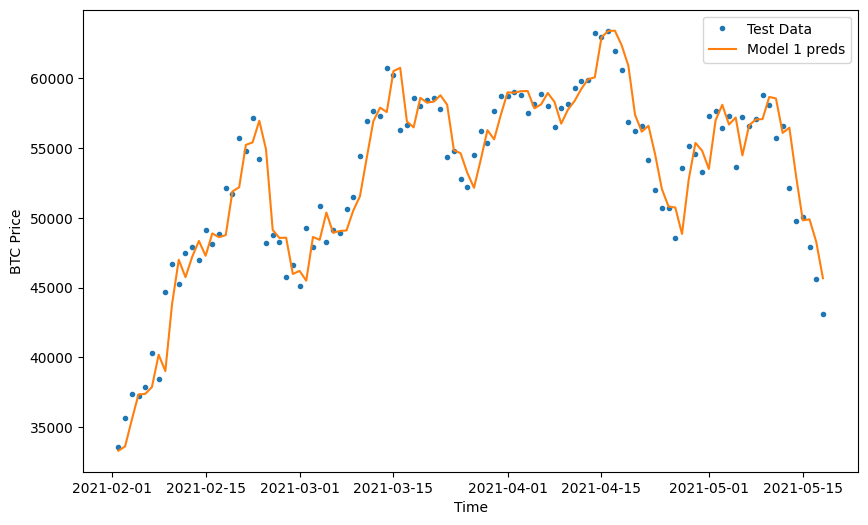

In [680]:
offset= 450
plt.figure(figsize=(10,6))

plot_time_series(timesteps= X_test[-len(test_windows):],
                values= test_labels,
                label='Test Data',
                start= offset)

plot_time_series(timesteps= X_test[-len(test_windows):],
                values= model_1_preds,
                label='Model 1 preds',
                start= offset,
                format='-')


In [660]:
test_labels.shape

(556, 1)

In [663]:
test_labels[:,0].shape

(556,)

## Model 2: Dense (window= 30, horizon= 1)

In [681]:
HORIZON= 1
WINDOW_SIZE=30

In [682]:
full_windows, full_labels= make_windows(prices, window_size=30, horizon=1)

In [685]:
full_windows.shape, full_labels.shape

((2757, 30), (2757, 1))

In [688]:
full_windows[0], full_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [686]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(windows= full_windows,
                                                                              labels= full_labels,
                                                                              test_split= 0.2)

In [687]:
train_windows.shape, test_windows.shape

((2205, 30), (552, 30))

In [689]:
train_windows[0], train_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [700]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_2_dense')

model_2.compile(loss= 'mae',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['mae', 'mse'])

history_model_2= model_2.fit(train_windows,
                            train_labels,
                            epochs=100,
                            batch_size=128,
                            validation_data=(test_windows, test_labels),
                            callbacks=[create_model_checkpoint(model_name= model_2.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 575.9229 - mae: 575.9229 - mse: 1176602.7500 - val_loss: 1803.2339 - val_mae: 1803.2339 - val_mse: 9392191.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 303.0427 - mae: 303.0427 - mse: 392593.6250 - val_loss: 1390.1340 - val_mae: 1390.1340 - val_mse: 6251757.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 228.9369 - mae: 228.9369 - mse: 254288.3438 - val_loss: 1102.6150 - val_mae: 1102.6150 - val_mse: 4362109.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 186.8782 - mae: 186.8782 - mse: 180406.8438 - val_loss: 1027.5614 - val_mae: 1027.5614 - val_mse: 3656877.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 174.2171 - mae: 174.2171 - mse: 161282.0000 - val_loss: 979.9332 - val_mae: 979.9332 - val_mse: 3380573.7500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 166.4343 - mae: 166.4343 - mse: 146720.5312 - val_loss: 915.5010 - val_mae: 915.5010 - val_

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 122.9233 - mae: 122.9233 - mse: 82934.1875 - val_loss: 649.5713 - val_mae: 649.5713 - val_mse: 1484166.5000
Epoch 42/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124.3917 - mae: 124.3917 - mse: 83175.1406 - val_loss: 646.6639 - val_mae: 646.6639 - val_mse: 1460781.7500
Epoch 43/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.8426 - mae: 121.8426 - mse: 81179.3594 - val_loss: 645.8207 - val_mae: 645.8207 - val_mse: 1456004.8750
Epoch 44/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.6668 - mae: 120.6668 - mse: 80474.4297 - val_loss: 649.4674 - val_mae: 649.4674 - val_mse: 1481271.1250
Epoch 45/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 118.8250 - mae: 118.8250 - mse: 77871.7344 - val_loss: 642.0431 - val_mae: 642.0431 - val_mse: 1450936.1250
Epoch 46/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.8691 - mae: 119.8691 - mse: 78175.8125 - val_loss: 683.0472 - val_mae: 683.0472 - val_mse: 1556025.1250
Epoch

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 130.9948 - mae: 130.9948 - mse: 79871.4375 - val_loss: 707.2675 - val_mae: 707.2675 - val_mse: 1543753.5000
Epoch 82/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 120.6623 - mae: 120.6623 - mse: 73237.1172 - val_loss: 644.2026 - val_mae: 644.2026 - val_mse: 1402503.2500
Epoch 83/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112.7634 - mae: 112.7634 - mse: 67356.2500 - val_loss: 656.3002 - val_mae: 656.3002 - val_mse: 1436256.8750
Epoch 84/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.3667 - mae: 117.3667 - mse: 70202.3438 - val_loss: 620.7157 - val_mae: 620.7157 - val_mse: 1329031.3750
Epoch 85/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114.4976 - mae: 114.4976 - mse: 68813.1250 - val_loss: 631.3024 - val_mae: 631.3024 - val_mse: 1360767.2500
Epoch 86/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.8627 - mae: 119.8627 - mse: 72451.2656 - val_loss: 666.5295 - val_mae: 666.5295 - val_mse: 1433086.5000
Epoch

In [701]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 359.3441 - mae: 359.3441 - mse: 440869.7188


[684.0435180664062, 684.0435180664062, 1490568.125]

In [703]:
model_2= tf.keras.models.load_model('model_checkpoints/model_2_dense.keras')
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 307.4802 - mae: 307.4802 - mse: 381628.0000 


[603.8431396484375, 603.8431396484375, 1276728.125]

In [704]:
model_2_preds= make_pred(model_2, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [706]:
model_2_results= evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 603.8431,
 'mse': 1276728.1,
 'rmse': 1129.924,
 'mape': 2.7519667,
 'mase': 1.0555235}

In [707]:
model_1_results

{'mae': 568.7464,
 'mse': 1164587.6,
 'rmse': 1079.1606,
 'mape': 2.5357583,
 'mase': 0.9991299}

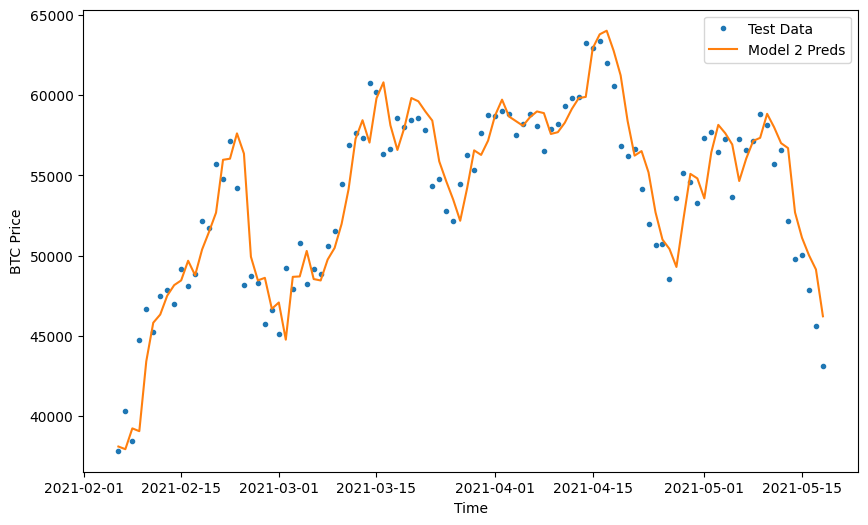

In [714]:
offset=450
plt.figure(figsize=(10,6))

plot_time_series(timesteps= X_test[-len(test_windows): ],
                values= test_labels,
                start= offset,
                label='Test Data')

plot_time_series(timesteps= X_test[-len(test_windows): ],
                values= model_2_preds,
                format='-',
                start= offset,
                label='Model 2 Preds')


In [717]:
X_test.shape, test_windows.shape

((558,), (552, 30))

## Model 3: Dense (window= 30, horizon= 7)

In [718]:
HORIZON= 7
WINDOW_SIZE= 30

full_windows, full_labels= make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows.shape, full_labels.shape

((2751, 36), (2751, 1))

In [719]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows,
                                                                              full_labels,
                                                                              0.2)

train_windows.shape, test_windows.shape

((2200, 36), (551, 36))

In [739]:
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_3_dense')

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               #metrics=['mae', 'mse']
               )

history_model_3= model_3.fit(train_windows,
                            train_labels,
                            epochs=100,
                            batch_size=128,
                            verbose=1,
                            validation_data=(test_windows, test_labels),
                            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1964.7089 - val_loss: 2742.4099
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 548.2646 - val_loss: 2579.2388
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 415.6942 - val_loss: 2075.0649
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 363.2081 - val_loss: 1652.7064
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.8918 - val_loss: 1566.8896
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 300.4474 - val_loss: 1471.9739
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 282.9752 - val_loss: 1325.7904
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 268.6531 - val_loss: 1278.1750
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259.7708 - val_loss: 1214.9701
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251.3861 - val_loss: 1200.6525
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 245.7410 - val_loss: 1150.2405
Epoch 

Epoch 67/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.3434 - val_loss: 894.0688
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 172.6503 - val_loss: 868.2440
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.1842 - val_loss: 891.9979
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.7593 - val_loss: 874.4914
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 169.0284 - val_loss: 883.3231
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.8127 - val_loss: 899.8107
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 169.3667 - val_loss: 871.6169
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166.1676 - val_loss: 898.4979
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 165.6956 - val_loss: 904.0099
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168.4935 - val_loss: 892.6719
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168.6119 - val_loss: 887.3604
Epoch 78/1

In [744]:
model_3.evaluate(test_windows, test_labels)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 472.5331


865.3538818359375

In [747]:
model_3= tf.keras.models.load_model('model_checkpoints/model_3_dense.keras')
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 455.9262  


833.4758911132812

In [748]:
model_3_preds= make_pred(model_3, test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9018.503 , 9028.544 , 9050.067 , 9020.588 , 9081.716 , 8986.977 ,
        9038.186 ],
       [9017.1045, 9034.875 , 8929.82  , 9062.121 , 8949.707 , 8841.295 ,
        8968.367 ],
       [8797.047 , 8838.361 , 8773.316 , 8801.354 , 8887.534 , 8728.086 ,
        8736.562 ],
       [8740.448 , 8773.197 , 8607.264 , 8837.2705, 8862.566 , 8743.482 ,
        8632.6875],
       [8890.403 , 8711.928 , 8400.872 , 8881.556 , 8768.857 , 8561.8955,
        8568.361 ]], dtype=float32)>

In [769]:
model_3_results= evaluate_preds((test_labels), model_3_preds)
model_3_results

{'mae': array([ 375.11215 ,  471.25504 ,  325.3478  ,  205.07674 ,  477.6038  ,
         314.36725 ,  365.66998 ,  804.8197  ,  901.2255  ,  517.6169  ,
         606.1407  ,  276.78558 ,  245.64412 ,  190.72957 ,  240.65723 ,
          76.376465,  289.52826 ,  506.56152 ,  443.1264  ,  413.91595 ,
         456.0369  ,  204.98682 ,  138.17117 ,  137.72865 ,  222.74951 ,
         429.94113 ,  407.92084 ,  364.50677 ,  306.87875 ,  205.21541 ,
         370.28836 ,  304.13937 ,  470.696   ,  658.97217 ,  386.32938 ,
         125.884415,  126.99965 ,   57.845425,  113.586494,  277.8234  ,
         182.43192 ,  237.90373 ,  291.1229  ,  144.32297 ,   95.39418 ,
         140.18004 ,  268.76822 ,  345.5644  ,  284.94977 ,  460.7864  ,
          59.625908,   69.439735,   85.78153 ,  162.65959 ,  364.7551  ,
         105.701866,  416.85825 ,   76.003   ,  196.48158 ,  192.37668 ,
         283.40527 ,  343.00558 ,  132.66309 ,  257.92368 ,   74.30957 ,
         185.12877 ,  627.23883 ,  358.86523

In [755]:
test_labels.shape 

(551, 1)

In [756]:
model_3_preds.shape

TensorShape([551, 7])

In [760]:
model_3_preds[:,0].shape

TensorShape([551])

In [762]:
{'mae': 892.3801,
 'mse': 2472144.2,
 'rmse': 1572.3054,
 'mape': 4.3318996,
 'mase': 1.5575155}

{'mae': 892.3801,
 'mse': 2472144.2,
 'rmse': 1572.3054,
 'mape': 4.3318996,
 'mase': 1.5575155}

In [764]:
test_labels.shape

(551, 1)

## Make our evaluation function work for larger horizons

In [787]:
model_3_results['mae'].shape, model_3_results['mae'].ndim

((551,), 1)

In [788]:
model_2_results['mae'].shape, model_2_results['mae'].ndim

((), 0)

In [795]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true= tf.cast(y_true, dtype=tf.float32)
    y_pred= tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various evaluation metrics 
    mae= tf.metrics.mae(y_true, y_pred)
    mse= tf.metrics.mse(y_true, y_pred)
    rmse= tf.sqrt(mse)
    mape= tf.metrics.mape(y_true, y_pred)
    mase= mean_absolute_scaled_error(y_true, y_pred)
    
    # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
    if mae.ndim > 0:
        mae= tf.reduce_mean(mae)
        mse= tf.reduce_mean(mse)
        rmse= tf.reduce_mean(rmse)
        mape= tf.reduce_mean(mape)
        mase= tf.reduce_mean(mase)
    
    return {'mae':mae.numpy(),
           'mse':mse.numpy(),
           'rmse':rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

In [789]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 455.9262 


833.4758911132812

In [792]:
tf.reduce_mean(model_3_results['mae']).numpy()

833.476

In [798]:
# Get model_3 results aggregated to single values
model_3_results= evaluate_preds((test_labels), model_3_preds)
model_3_results

{'mae': 833.476,
 'mse': 2196432.0,
 'rmse': 865.5505,
 'mape': 4.0311766,
 'mase': 1.4547071}

In [802]:
model_2_results

{'mae': 603.8431,
 'mse': 1276728.1,
 'rmse': 1129.924,
 'mape': 2.7519667,
 'mase': 1.0555235}

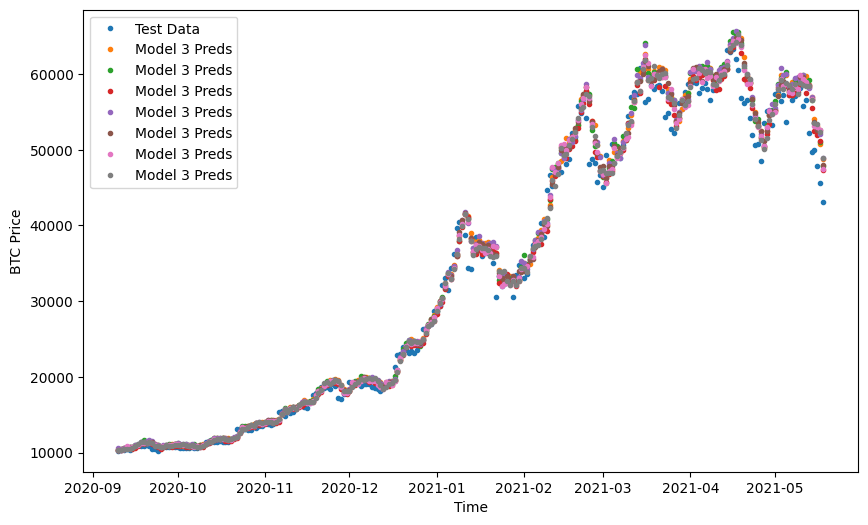

In [806]:
offset=300
plt.figure(figsize=(10,6))

plot_time_series(X_test[-len(test_windows):], test_labels, start=offset, label='Test Data')
plot_time_series(X_test[-len(test_windows):], model_3_preds, start=offset, label='Model 3 Preds')

In [808]:
test_labels[:5]

array([[8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [809]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9018.503 , 9028.544 , 9050.067 , 9020.588 , 9081.716 , 8986.977 ,
        9038.186 ],
       [9017.1045, 9034.875 , 8929.82  , 9062.121 , 8949.707 , 8841.295 ,
        8968.367 ],
       [8797.047 , 8838.361 , 8773.316 , 8801.354 , 8887.534 , 8728.086 ,
        8736.562 ],
       [8740.448 , 8773.197 , 8607.264 , 8837.2705, 8862.566 , 8743.482 ,
        8632.6875],
       [8890.403 , 8711.928 , 8400.872 , 8881.556 , 8768.857 , 8561.8955,
        8568.361 ]], dtype=float32)>

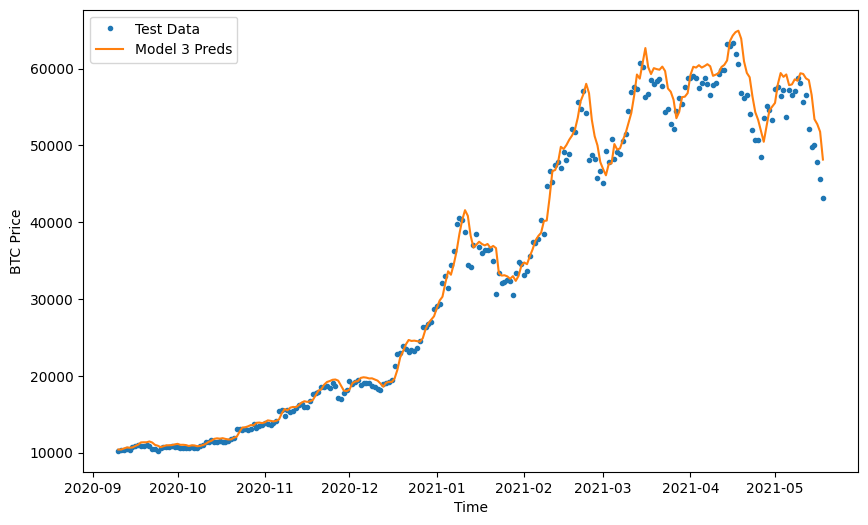

In [820]:
offset=300
plt.figure(figsize=(10,6))

plot_time_series(X_test[-len(test_windows):], test_labels, start=offset, label='Test Data')
plot_time_series(X_test[-len(test_windows):], tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label='Model 3 Preds')

In [819]:
tf.reduce_mean(model_3_preds, axis=1).shape

TensorShape([551])

## Which of our models is performing the best so far?

<Axes: >

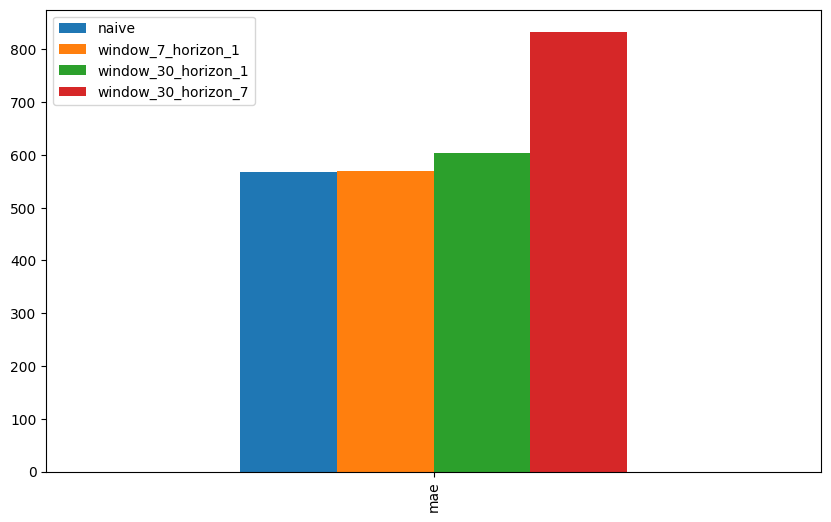

In [830]:
pd.DataFrame({'naive': naive_results['mae'],
             'window_7_horizon_1': model_1_results['mae'],
             'window_30_horizon_1': model_2_results['mae'],
             'window_30_horizon_7': model_3_results['mae']}, index=['mae']).plot(kind='bar', figsize=(10,6))

## Model 4: Conv1D

In [832]:
HORIZON=1
WINDOW_SIZE=7

full_windows, full_labels= make_windows(prices, horizon=HORIZON, window_size=WINDOW_SIZE)
full_windows.shape, full_labels.shape

((2780, 7), (2780, 1))

In [833]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
train_windows.shape, test_windows.shape

((2224, 7), (556, 7))

To use the Conv1D layer, we need an input shape of: ```(batch_size, timesteps, input_dim)```...

However our data isn't in that shape yet...

In [835]:
# Check data input shape
train_windows[0].shape

(7,)

In [836]:
# Before we pass our data to Conv1D layer, we have to reshape it in order to make sure it works
x= tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [841]:
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`
expand_dims_layer

<Lambda name=lambda_4, built=False>

In [847]:
tf.expand_dims(x, axis=1)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]])>

In [849]:
a= lambda x: tf.expand_dims(x, axis=1)
a(x)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]])>

In [850]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [851]:
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [852]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")
     

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [853]:
train_windows.shape

(2224, 7)

In [862]:
tf.expand_dims(train_windows, axis=2).shape

TensorShape([2224, 7, 1])

In [864]:
expand_dims_layer(train_windows).shape

TensorShape([2224, 1, 7])

In [1072]:
# Create Conv1D 
tf.random.set_seed(42)

model_4= tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_4_conv1d')

model_4.compile(loss= 'mae',
               optimizer='adam',
               )

history_model_4= model_4.fit(x= train_windows,
                            y= train_labels,
                            #x= tf.expand_dims(train_windows, axis=2),
                            #y= tf.expand_dims(train_labels, axis=2),
                            epochs= 100,
                            batch_size= 128,
                            validation_data=(test_windows, test_labels),
                            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2835.8064 - val_loss: 5045.3667
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 473.0885 - val_loss: 1209.8344
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 212.2612 - val_loss: 1072.8938
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 192.6315 - val_loss: 1086.2184
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182.4384 - val_loss: 1061.2716
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 179.6008 - val_loss: 1055.6294
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 177.5983 - val_loss: 1045.4247
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 175.6191 - val_loss: 1028.9957
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.3873 - val_loss: 1018.7746
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 171.2758 - val_loss: 1001.6046
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168.7650 - val_loss: 989.9420
Epoch 1

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110.8710 - val_loss: 605.8724
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.8927 - val_loss: 588.6609
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.2106 - val_loss: 600.2755
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.9496 - val_loss: 591.7220
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.0117 - val_loss: 607.8117
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.2749 - val_loss: 590.5272
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.0006 - val_loss: 615.8878
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.3871 - val_loss: 587.8277
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.7334 - val_loss: 607.5213
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110.0490 - val_loss: 584.2317
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.8619 - val_loss: 585.6769
Epoch 78/100
18/18 ━━━━

In [1073]:
train_windows.shape

(2224, 7)

In [1074]:
tf.expand_dims(train_windows, axis=2).shape

TensorShape([2224, 7, 1])

In [1075]:
train_labels.shape

(2224, 1)

In [1076]:
tf.expand_dims(train_labels, axis=2).shape

TensorShape([2224, 1, 1])

In [1077]:
model_4.summary()

Model: "model_4_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_59 (Lambda)              │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_66 (Conv1D)              │ (None, 1, 128)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [1078]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,308 (9.02 KB)

In [1079]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 285.9971 


573.1429443359375

In [1080]:
#model_4= tf.keras.models.load_model('model_checkpoints/model_4_conv1d.keras', safe_mode=False)

In [1081]:
model_4_preds= make_pred(model_4, test_windows)
model_4_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8881.511, 8778.773, 9018.626, 8794.148, 8725.962], dtype=float32)>

In [1082]:
model_4_results= evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 573.1429,
 'mse': 1185085.4,
 'rmse': 1088.6162,
 'mape': 2.5604084,
 'mase': 1.0068533}

In [1083]:
test_labels.shape, model_4_preds.shape

((556, 1), TensorShape([556]))

In [1084]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Model 5: LSTM

In [1085]:
WINDOW_SIZE

7

In [1159]:
import tensorflow as tf
tf.random.set_seed(42)

inputs= layers.Input(shape=(WINDOW_SIZE,))
x= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x= layers.LSTM(128, return_sequences=True)(x)
x= layers.LSTM(128, activation='relu')(x)
# x= layers.Dense(32, activation='relu')(x)
outputs= layers.Dense(HORIZON)(x)
model_5= tf.keras.Model(inputs=inputs, outputs=outputs, name='model_5_LSTM')

model_5.compile(loss='mae',
               optimizer='adam',
               )

history_model_5= model_5.fit(train_windows,
                            train_labels,
                            epochs=100,
                            batch_size=128,
                            validation_data=(test_windows, test_labels),
                            callbacks=[create_model_checkpoint(model_name= model_5.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2529.3511 - val_loss: 8013.1943
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 775.5382 - val_loss: 1191.2321
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 195.4990 - val_loss: 993.9052
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 174.9067 - val_loss: 1022.9016
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 170.7498 - val_loss: 980.9476
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 168.6446 - val_loss: 980.5125
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 167.6496 - val_loss: 978.8511
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 165.8424 - val_loss: 975.9428
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 164.2001 - val_loss: 965.9893
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 162.4074 - val_loss: 946.6356
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 160.4000 - val_loss: 939.5025
Epoch 12/10

Epoch 67/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.7865 - val_loss: 595.2289
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110.6232 - val_loss: 589.5972
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 110.2645 - val_loss: 587.6817
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 110.1982 - val_loss: 587.2131
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 110.2814 - val_loss: 585.7510
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 109.8959 - val_loss: 584.9468
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 109.8381 - val_loss: 584.2780
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 109.6679 - val_loss: 583.2043
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109.6114 - val_loss: 586.1095
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 109.6806 - val_loss: 581.6542
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 109.3067 - val_loss: 583.6856
Epoch 78

In [1160]:
model_5.summary()

Model: "model_5_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_103 (InputLayer)    │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_84 (Lambda)              │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 128)            │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [1161]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 287.0582 


573.7553100585938

In [1150]:
# model_5= tf.keras.models.load_model('model_checkpoints/model_5_LSTM.keras', )
# model_5.evaluate(test_windows, test_labels)

In [1163]:
model_5_preds= make_pred(model_5, test_windows)
model_5_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8863.151, 8761.839, 8989.567, 8748.656, 8705.595], dtype=float32)>

In [1165]:
model_5_results= evaluate_preds(test_labels, model_5_preds)
model_5_results

{'mae': 573.7553,
 'mse': 1186509.4,
 'rmse': 573.7553,
 'mape': 2.578012,
 'mase': 30.082026}

In [1167]:
model_1_results

{'mae': 568.7464,
 'mse': 1164587.6,
 'rmse': 1079.1606,
 'mape': 2.5357583,
 'mase': 0.9991299}

## Make multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

- day 1 - 0
- day 2 - 1
- day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [1178]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [1192]:
bitcoin_prices.index[0], bitcoin_prices.values[0]

(Timestamp('2013-10-01 00:00:00'), array([123.65499]))

In [1188]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime= np.datetime64('2012-11-08')
block_reward_3_datetime= np.datetime64('2016-07-09')
block_reward_4_datetime= np.datetime64('2020-05-18')

block_reward_2_datetime

numpy.datetime64('2012-11-08')

In [1199]:
block_reward_2_days= (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days= (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_4_days= (bitcoin_prices.index[-1] - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days, block_reward_4_days

(1012, 2421, 2786)

In [1201]:
len(bitcoin_prices)

2787

In [1205]:
bitcoin_prices_block= bitcoin_prices.copy()
bitcoin_prices_block['block_reward']=None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [1221]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1]= block_reward_2

bitcoin_prices_block[:block_reward_2_days]

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25
...,...,...
2016-07-04,670.74100,25
2016-07-05,679.35100,25
2016-07-06,676.87200,25


In [1224]:
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1]= block_reward_3
bitcoin_prices_block[block_reward_2_days:block_reward_3_days]

,Price,block_reward
Date,,
2016-07-09,654.852990,12.5
2016-07-10,649.356000,12.5
2016-07-11,656.747000,12.5
2016-07-12,648.136000,12.5
2016-07-13,663.443000,12.5
...,...,...
2020-05-13,8815.231245,12.5
2020-05-14,9330.986485,12.5
2020-05-15,9757.296586,12.5


In [1225]:
bitcoin_prices_block.iloc[block_reward_3_days: , -1]=block_reward_4
bitcoin_prices_block[block_reward_3_days:]

,Price,block_reward
Date,,
2020-05-18,9684.701959,6.25
2020-05-19,9723.680150,6.25
2020-05-20,9719.480854,6.25
2020-05-21,9540.886567,6.25
2020-05-22,9141.150637,6.25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

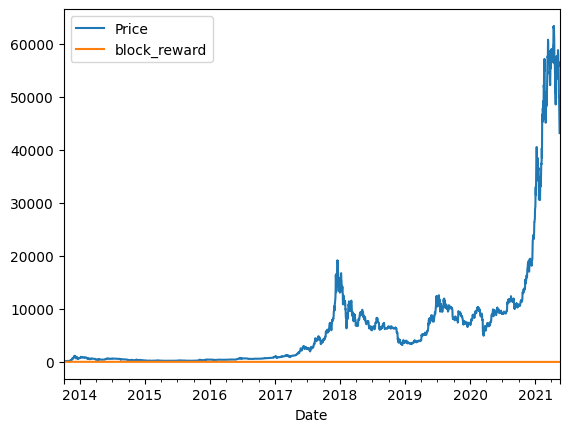

In [1226]:
bitcoin_prices_block.plot()

(0.0, 100.0)

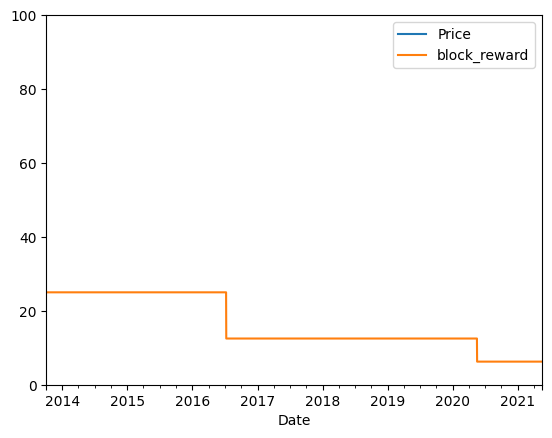

In [1230]:
bitcoin_prices_block.plot()
plt.ylim(0,100)

In [1237]:
# Plot block reward vs price over time
from sklearn.preprocessing import minmax_scale

bitcoin_prices_block_scaled= pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                         columns=bitcoin_prices_block.columns,
                                         index= bitcoin_prices_block.index)
bitcoin_prices_block_scaled

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0
...,...,...
2021-05-14,0.785214,0.0
2021-05-15,0.789461,0.0
2021-05-16,0.755509,0.0


<Axes: xlabel='Date'>

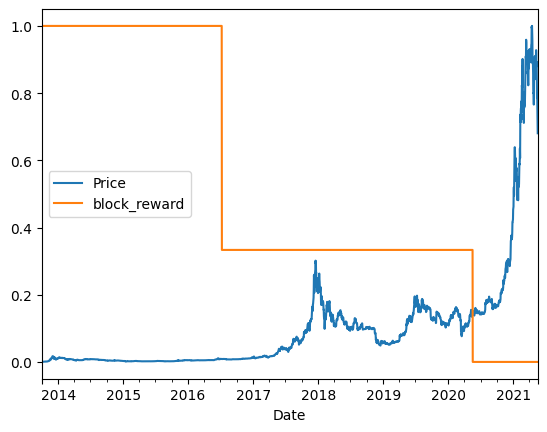

In [1238]:
bitcoin_prices_block_scaled.plot()

## Making a windowed dataset with pandas

In [1239]:
# Setup dataset hyperparameters
HORIZON=1
WINDOW_SIZE=7

In [1246]:
bitcoin_prices_windowed= bitcoin_prices_block.copy()
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [1252]:
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f'Price+{i+1}']= bitcoin_prices_windowed['Price'].shift(periods= i+1)
    
bitcoin_prices_windowed[:10]

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [1255]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we've done is created a way to window our dataset directly from a pandas dataframe.
```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [1278]:
X= bitcoin_prices_windowed.dropna(axis=0).drop('Price', axis=1).astype(np.float32)
y= bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [1280]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [1283]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [1285]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [1279]:
X.dtypes

block_reward    float32
Price+1         float32
Price+2         float32
Price+3         float32
Price+4         float32
Price+5         float32
Price+6         float32
Price+7         float32
dtype: object

In [1282]:
y.dtypes

dtype('float32')

In [1286]:
X.shape, y.shape

((2780, 8), (2780,))

In [1289]:
split_size= int(len(X) * 0.8)

X_train, y_train= X[:split_size], y[:split_size]
X_test, y_test= X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6 (multivariate time series)

In [1291]:
HORIZON

1

In [1310]:
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
],name='model_6_dense_multivariate')

model_6.compile(loss='mae',
               optimizer='adam',
               )

history_model_6= model_6.fit(X_train,
                            y_train,
                            epochs=100,
                            batch_size=128,
                            validation_data=(X_test,y_test),
                            callbacks=[create_model_checkpoint(model_name= model_6.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3949.4285 - val_loss: 6095.2075
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 586.5292 - val_loss: 1311.4524
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 255.6497 - val_loss: 1294.2551
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217.4014 - val_loss: 1131.8683
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 195.9159 - val_loss: 1109.1479
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187.9108 - val_loss: 1090.0157
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 182.5865 - val_loss: 1056.2454
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 178.1898 - val_loss: 1041.3231
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174.1830 - val_loss: 1006.0107
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 169.5164 - val_loss: 976.0693
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 165.0993 - val_loss: 942.9478
Epoch 12

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.6844 - val_loss: 592.0803
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.8102 - val_loss: 576.2321
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.3862 - val_loss: 591.3514
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.6153 - val_loss: 578.9257
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.7695 - val_loss: 581.9085
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.5966 - val_loss: 593.8649
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.2607 - val_loss: 593.5157
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.6081 - val_loss: 577.6299
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.6517 - val_loss: 571.3642
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.6392 - val_loss: 575.7932
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108.2566 - val_loss: 570.8240
Epoch 78/100
18/18 ━━━━

In [1311]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288.7800 


573.4032592773438

In [1312]:
model_6= tf.keras.models.load_model('model_checkpoints/model_6_dense_multivariate.keras')

In [1313]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.4402 


567.1317138671875

In [1314]:
model_6_preds= make_pred(model_6, X_test)
model_6_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8878.048, 8807.738, 9049.822, 8792.933, 8753.68 ], dtype=float32)>

In [1315]:
model_6_results= evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 567.13165,
 'mse': 1167876.6,
 'rmse': 1080.6833,
 'mape': 2.53182,
 'mase': 0.99629325}

In [1316]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [1317]:
model_1_results

{'mae': 568.7464,
 'mse': 1164587.6,
 'rmse': 1079.1606,
 'mape': 2.5357583,
 'mase': 0.9991299}

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer
Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models


In [1336]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size: int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers: int,
                **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size= input_size
        self.theta_size= theta_size
        self.horizon= horizon
        self.n_neurons= n_neurons
        self.n_layers= n_layers
        
        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden_layer= [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        
        # Output of block is a theta layer with linear activation
        self.theta_layer= tf.keras.layers.Dense(theta_size, activation='linear')
        
    def call(self, inputs):
        x= inputs
        for layer in self.hidden_layer:
            x= layer(x)
            
        theta= self.theta_layer(x)
        
        # Output the backcast and the forecast from theta
        backcast, forecast= theta[:, :self.input_size], theta[:, -self.horizon:]
        
        return backcast, forecast
    

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [1337]:
WINDOW_SIZE, HORIZON

(7, 1)

In [1339]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer= NBeatsBlock(input_size= WINDOW_SIZE,
                                    horizon= HORIZON,
                                    theta_size= WINDOW_SIZE + HORIZON, # backcast + forecast
                                    n_neurons= 128,
                                    n_layers= 4
                                    )

In [1349]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs= tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)

dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [1359]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast= dummy_nbeats_block_layer(dummy_inputs)
backcast,'', forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.08295223,  0.36995485,  0.75384796, -0.01819762,  0.08887057,
          0.66613656,  0.7138121 ]], dtype=float32)>,
 '',
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.41957933]], dtype=float32)>)

### Preparing data for the N-BEATS algorithm using ```tf.data```
To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [1361]:
HORIZON=1
WINDOW_SIZE= 7

In [1362]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [1369]:
# Add windowed columns
bitcoin_prices_nbeats= bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}']= bitcoin_prices_nbeats['Price'].shift(periods= i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [1383]:
# Make features and labels
X= bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y= bitcoin_prices_nbeats.dropna()['Price']
X.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [1380]:
y.head()

Date
2013-10-08    123.03300
2013-10-09    124.04900
2013-10-10    125.96116
2013-10-11    125.27966
2013-10-12    125.92750
Name: Price, dtype: float64

In [1390]:
# Make train and test sets
split_size= int(len(X) * 0.8)

X_train, y_train= X[:split_size], y[:split_size]
X_test, y_test= X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [1401]:
# Make out dataset performant using tf.data API
train_features_dataset= tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset= tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset= tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset= tf.data.Dataset.from_tensor_slices(y_test)

# Conmbine features and labels by zipping together -> (features, labels)
train_dataset= tf.data.Dataset.zip(train_features_dataset, train_labels_dataset)
test_dataset= tf.data.Dataset.zip(test_features_dataset, test_labels_dataset)

# Batch and prefetch datasets
BATCH_SIZE= 1024
train_dataset= train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

len(train_dataset), len(test_dataset)

(3, 1)

In [1403]:
train_dataset, '', test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 '',
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [1409]:
len(train_features_dataset)/1024


2.171875

In [1414]:
X_test.iloc[0]

Price+1    8794.358645
Price+2    9226.485821
Price+3    9335.752402
Price+4    9326.599624
Price+5    9369.628081
Price+6    9202.415451
Price+7    9290.896602
Name: 2019-11-10 00:00:00, dtype: float64

### Setting up hyperparameters for N-BEATS algorithm
The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [1417]:
# Values from N-BEATS paper
N_EPOCHS= 5000
N_NEURONS= 512
N_LAYERS= 4
N_STACKS= 30

INPUT_SIZE= WINDOW_SIZE * HORIZON
THETA_SIZE= INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [1427]:
# Make tensors
tensor_1= tf.range(10) + 10
tensor_2= tf.range(10)

# Subtract
subtracted= layers.subtract([tensor_1,tensor_2])

# Add
added= layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")
     

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
* Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
* Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [1443]:
%%time

tf.random.set_seed(42)

# 1. Setup and instanse of NBeatsBlock
nbeats_block_layer= NBeatsBlock(input_size= INPUT_SIZE,
                               theta_size= THETA_SIZE,
                               horizon= HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers= N_LAYERS,
                               name='InitialBlock')

# 2. Create input to stack
stack_input= layers.Input(shape=(INPUT_SIZE,), name='stack_input')

# 3. Create initial backcast and forecast input (backward prediction + horizon prediction)
residuals, forecast= nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)
    # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast= NBeatsBlock(input_size= INPUT_SIZE,
                                         theta_size= THETA_SIZE,
                                         horizon= HORIZON,
                                         n_neurons= N_NEURONS,
                                         n_layers= N_LAYERS,
                                         name= f'NBeatsBlock_{i}'
                                         )(residuals)
    
    # 6. Create the double residual stacking
    residuals= layers.subtract([residuals, backcast], name=f'subtrackt_{i}')
    forecast= layers.add([forecast, block_forecast], name=f'add_{i}')
    
# 7. Put the stack model together
model_7= tf.keras.Model(inputs= stack_input,
                       outputs= forecast,
                       name='model_7_NBEATS')

# 8. Compile model with AME loss
model_7.compile(loss='mae',
               optimizer='adam')

# 9. Fit the models with EarlyStopping and ReduceLROnPlateau callbacks
history_model_7= model_7.fit(train_dataset,
                            epochs= N_EPOCHS,
                            batch_size= BATCH_SIZE, # 1024
                            verbose= 0,
                            validation_data= test_dataset,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                                       patience= 200,
                                                                       restore_best_weights= True,
                                                                       verbose=1),
                                       
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                          patience=100,
                                                                          verbose=1)]
                            )


Epoch 912: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1305: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1405: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 1405: early stopping
Restoring model weights from the end of the best epoch: 1205.
CPU times: user 5h 2min 26s, sys: 8min 36s, total: 5h 11min 2s
Wall time: 1h 42min 20s


In [1440]:
N_STACKS, np.arange(N_STACKS-1)

(30,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]))

In [1444]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 571.1510


571.1510009765625

In [1446]:
model_7_preds= make_pred(model_7, test_dataset)
model_7_preds[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8831.923, 8773.158, 9028.869, 8749.74 , 8750.476], dtype=float32)>

In [1447]:
model_7_results= evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 571.15076,
 'mse': 1158088.4,
 'rmse': 1076.1451,
 'mape': 2.590305,
 'mase': 1.0033537}

In [1448]:
 naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [1449]:
model_1_results

{'mae': 568.7464,
 'mse': 1164587.6,
 'rmse': 1079.1606,
 'mape': 2.5357583,
 'mase': 0.9991299}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as model_1 or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.



### Plotting the N-BEATS architecture we've created

In [1451]:
from tensorflow.keras.utils import plot_model

plot_model(model_7,show_layer_names=True)

## Model 8: Creating an ensemble (stacking different models together)
An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.m

In [1453]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)


In [1464]:
def get_ensemble_models(horizon= HORIZON,
                       train_data= train_dataset,
                       test_data= test_dataset,
                       num_iter= 10,
                       num_epochs= 1000,
                       loss_fns=['mae', 'mse', 'mape']):
    
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

    For example, if num_iter=10, a list of 30 trained models will be returned: 
    10 * len(["mae", "mse", "mape"]).
    """
    # Make empty list for trained ensemble models
    ensemble_models=[]
    
    # Create num_iter number of models per loss functions
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f'\nOptimizing model by reducing: {loss_function} for {num_epochs} epochs, model number {i}')
            
            # Construct a simplemodel (similar to model_1)
            model= tf.keras.Sequential([
                # Initialize dense layers with normal distribution for estimating prediction intervals later on
                layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
                layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
                layers.Dense(horizon, activation='linear')
            ])
            
            # Compile simple model with current loss function
            model.compile(loss= loss_function,
                         optimizer= 'adam',
                         metrics=['mae', 'mse'])
            
            # Fit the current model
            model.fit(train_data,
                     epochs= num_epochs,
                     verbose= 0,
                     validation_data= test_data,
                     callbacks= [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                      patience= 100,
                                                                      verbose= 1),
                                
                                 tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience= 200, 
                                                                  verbose= 1,
                                                                  restore_best_weights= True)])
            # Append fitted model to list of ensemble models
            ensemble_models.append(model)
            
    return ensemble_models
    

In [1465]:
%%time

# Get list of trained ensemble models
ensemble_models= get_ensemble_models(num_iter= 5,
                                    num_epochs= 1000)


Optimizing model by reducing: mae for 1000 epochs, model number 0

Epoch 951: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch: 997.

Optimizing model by reducing: mse for 1000 epochs, model number 0

Epoch 425: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 525: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 525: early stopping
Restoring model weights from the end of the best epoch: 325.

Optimizing model by reducing: mape for 1000 epochs, model number 0

Epoch 161: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch: 1000.

Optimizing model by reducing: mae for 1000 epochs, model number 1

Epoch 346: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 542: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 642: ReduceLROnPlateau reducing le

In [1466]:
len(ensemble_models)

15

In [1467]:
ensemble_models

[<Sequential name=sequential_24, built=True>,
 <Sequential name=sequential_25, built=True>,
 <Sequential name=sequential_26, built=True>,
 <Sequential name=sequential_27, built=True>,
 <Sequential name=sequential_28, built=True>,
 <Sequential name=sequential_29, built=True>,
 <Sequential name=sequential_30, built=True>,
 <Sequential name=sequential_31, built=True>,
 <Sequential name=sequential_32, built=True>,
 <Sequential name=sequential_33, built=True>,
 <Sequential name=sequential_34, built=True>,
 <Sequential name=sequential_35, built=True>,
 <Sequential name=sequential_36, built=True>,
 <Sequential name=sequential_37, built=True>,
 <Sequential name=sequential_38, built=True>]

In [1469]:
ensemble_models[0].layers

[<Dense name=dense_666, built=True>,
 <Dense name=dense_667, built=True>,
 <Dense name=dense_668, built=True>]

### Make predictions with our ensemble model


In [1471]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds= []
    for model in ensemble_models:
        preds= model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))


In [1475]:
%%time
ensemble_preds= make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 143 ms, sys: 13.9 ms, total: 156 ms
Wall time: 179 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8793.589,  8764.088,  9026.861, ..., 50055.055, 48806.266,
        46591.836],
       [ 8771.143,  8756.503,  9072.769, ..., 49657.855, 48568.17 ,
        45785.863],
       [ 8736.032,  8788.131,  9020.927, ..., 49578.625, 48203.9  ,
        46291.996],
       ...,
       [ 8782.784,  8826.313,  9050.845, ..., 50689.367, 48093.92 ,
        45993.938],
       [ 8695.027,  8781.409,  9046.413, ..., 49858.33 , 47435.06 ,
        45309.28 ],
       [ 8772.213,  8792.138,  9066.325, ..., 50270.16 , 48766.004,
        46221.355]], dtype=float32)>

In [1500]:
ensemble_mean= tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8778.745, 8782.287, 9056.745, 8709.704, 8744.243, 8731.473,
       8629.873, 8493.45 , 8450.883, 8517.452], dtype=float32)>

In [1501]:
ensemble_median= np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8781.45 , 8781.491, 9061.423, 8719.053, 8742.378, 8735.112,
       8627.55 , 8502.08 , 8442.605, 8515.128], dtype=float32)

In [1508]:
ensemble_results= evaluate_preds(y_test,ensemble_preds)

ensemble_results

{'mae': 581.61035,
 'mse': 1186128.8,
 'rmse': 1088.9712,
 'mape': 2.6425865,
 'mase': 1.0217284}

In [1509]:
ensemble_results= evaluate_preds(y_test, ensemble_mean)
ensemble_results

{'mae': 570.14307,
 'mse': 1151925.6,
 'rmse': 1073.278,
 'mape': 2.5779355,
 'mase': 1.0015835}

In [1510]:
ensemble_results= evaluate_preds(y_test, ensemble_median)
ensemble_results

{'mae': 569.8157,
 'mse': 1145324.9,
 'rmse': 1070.1985,
 'mape': 2.5707653,
 'mase': 1.0010083}

In [1505]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [1506]:
model_1_results

{'mae': 568.7464,
 'mse': 1164587.6,
 'rmse': 1079.1606,
 'mape': 2.5357583,
 'mase': 0.9991299}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble
So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)
* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [1513]:
# Find upper and lower bounds of ensemble predictions
def get_lower_upper(preds): # 1. Take the predictions from a number of randomly intialized models
    
    # 2. Measure the standard deviation of the predictions
    std= tf.math.reduce_std(preds, axis=0)
    
    # 3. Multiply the standard deviation by 1.96
    interval= std * 1.96
    
    # 4. Get the prediction interval upper and lower bounds
    preds_mean= tf.reduce_mean(preds, axis=0)
    lower, upper= preds_mean - interval, preds_mean + interval
    
    return lower, upper

In [1515]:
# Get the lower and upper bounds of the 95% percent prediction interval
lower, upper= get_lower_upper(ensemble_preds)
lower.shape, upper.shape

(TensorShape([556]), TensorShape([556]))

>📖 Resource: Many of the steps we've taken above have inspired/referenced from the Machine Learning Mastery blog post on [Prediction Intervals for Deep Learning Neural Networks](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/)

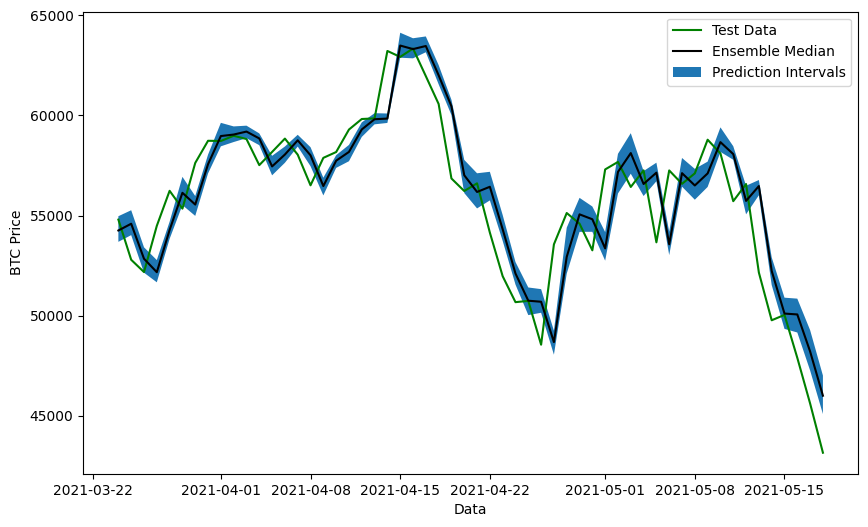

In [1562]:
# Get the median/mean values of our ensemble preds
ensemble_median= np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset= 500
plt.figure(figsize=(10,6))
plt.plot(X_test.index[offset:], y_test[offset:], 'g-', label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.fill_between(X_test.index[offset:], lower[offset:], upper[offset:], label='Prediction Intervals' )
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend()

In [1519]:
X_test.shape

(556, 7)

In [1532]:
X_test.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2019-11-10,8794.358645,9226.485821,9335.752402,9326.599624,9369.628081,9202.415451,9290.896602
2019-11-11,8798.042055,8794.358645,9226.485821,9335.752402,9326.599624,9369.628081,9202.415451
2019-11-12,9081.186878,8798.042055,8794.358645,9226.485821,9335.752402,9326.599624,9369.628081
2019-11-13,8711.534339,9081.186878,8798.042055,8794.358645,9226.485821,9335.752402,9326.599624
2019-11-14,8760.892718,8711.534339,9081.186878,8798.042055,8794.358645,9226.485821,9335.752402


In [1536]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [1525]:
y_test.head()

Date
2019-11-10    8798.042055
2019-11-11    9081.186878
2019-11-12    8711.534339
2019-11-13    8760.892718
2019-11-14    8749.520591
Name: Price, dtype: float64

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

>    🔑 Note: These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

### Aside: two types of uncertainty (coconut and subway)
Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:

1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)
There are two major types of uncertainty in machine learning you should know about:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

Weve only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty



## Model 9: Train a model on the full historical data to make predictions into the future
So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [1570]:
HORIZON=1
WINDOW_SIZE=7

In [1572]:
bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [1588]:
# Train model on entire data to make predictions for the next day
X_all= bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()

# Get labels
y_all= bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [1589]:
X_all.shape, X_all[:5]

((2780, 7),
 array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]))

In [1590]:
y_all.shape, y_all[:5]

((2780,), array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [1637]:
# Turn data into efficient running tensors
features_dataset_all= tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all= tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all= tf.data.Dataset.zip(features_dataset_all,labels_dataset_all)

# Batch and prefetch for optimal performant
BATCH_SIZE= 1024
dataset_all= dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [1638]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_9_real_future_forecast')
 
model_9.compile(loss='mae',
               optimizer='adam')

# Fit model on all of the data to make future forecasts
history_model_9= model_9.fit(dataset_all,
                            epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3434.2100
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2328.9958
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1250.5298
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284.9281
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 691.9435
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 769.7097
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 433.9472
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 249.4539
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 383.2551
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 315.7690
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 205.0238
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 267.8905
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 231.5704
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 211.4820
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 219.91

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 153.4051
Epoch 83/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 153.9610
Epoch 84/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 151.8687
Epoch 85/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 150.8624
Epoch 86/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 148.4005
Epoch 87/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 148.6924
Epoch 88/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 148.2358
Epoch 89/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 150.2745
Epoch 90/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 150.9413
Epoch 91/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 150.7456
Epoch 92/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149.4090
Epoch 93/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 146.1162
Epoch 94/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 146.4184
Epoch 95/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 148.9354
Epoch 96/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 152.5645
Epoc

### Make predictions into future



In [1639]:
# How many timestesp to predict into the future?
INTO_FUTURE= 14

To make predictions into the future we want a function which:

1. Takes as input:
* a list of values (Bitcoin historical data)
* a trained model (such as `model_9`)
* a window into the future to predict (our ``INTO_FUTURE`` variable)
* the window size a model was trained on (```WINDOW_SIZE```) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction


In [1818]:
# 1. Create function to make predictions into the future
def make_future_forecast(model, values, into_future, window_size= WINDOW_SIZE) -> list:
    
    """
    Make future forecasts into_future steps after values ends.

    Returns future forecasts as a list of floats.
    """
    
    # 2. Create an empty list for future forcasts/prepare data to forcast on
    future_forcast= []
    last_window= values[-WINDOW_SIZE:]
    
    # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
    for _ in range(INTO_FUTURE):
        # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
        future_pred= model.predict(tf.expand_dims(last_window, axis=0))
        print(f'[{_}] Predicting on:\n {last_window}\n -> Prediction: {tf.squeeze(future_pred).numpy()}\n')
        
        # Append prediction to future_forcast
        future_forcast.append(tf.squeeze(future_pred).numpy())
        
        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window= np.append(last_window, future_pred)[-WINDOW_SIZE:]
        
    return future_forcast

In [1819]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

>🛠 Exercise: In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.
>
>So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.
>
>As it is, the make_future_forecasts() function skips the retraining of a model part.

In [1820]:
# Make forecast into the future
future_forcast= make_future_forecast(model= model_9,
                                    values= y_all,
                                    window_size= WINDOW_SIZE,
                                    into_future= INTO_FUTURE)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0] Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]
 -> Prediction: 54965.77734375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[1] Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54965.77734375]
 -> Prediction: 52823.01171875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[2] Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54965.77734375 52823.01171875]
 -> Prediction: 49671.00390625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[3] Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54965.77734375 52823.01171875 49671.00390625]
 -> Prediction: 48957.0234375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[4] Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 54965.77734375
 52823.01171875 49671.00390625 48957.0234375 ]
 -> Prediction: 45765.55078125

1/1 ━━━━━━━

### Plot future forecasts

In [1821]:
future_forcast

[54965.777,
 52823.01,
 49671.004,
 48957.023,
 45765.55,
 47294.605,
 47513.023,
 54206.96,
 52650.473,
 48676.285,
 48004.98,
 45900.08,
 48955.496,
 50456.918]

In [1822]:
def get_future_dates(start_date, into_future, offset=1):
    '''
    Returns array of datetime values ranging from start_date to start_date+into_future
    '''
    
    start_date= start_date + np.timedelta64(offset, 'D') # specify start date, 'D' stands for day
    end_date= start_date + np.timedelta64(into_future, 'D')
    print(f'Start date: {start_date} - End date: {end_date}')
    
    
    return np.arange(start_date, end_date, dtype= 'datetime64[D]')

In [1823]:
type(bitcoin_prices_windowed.index[-1]), bitcoin_prices_windowed.index[-1]

(pandas._libs.tslibs.timestamps.Timestamp, Timestamp('2021-05-18 00:00:00'))

In [1824]:
start_date= bitcoin_prices_windowed.index[-1] + np.timedelta64(1, 'D')
start_date

Timestamp('2021-05-19 00:00:00')

In [1825]:
end_date= start_date + np.timedelta64(14, 'D')
end_date

Timestamp('2021-06-02 00:00:00')

In [1826]:
a= np.arange(start_date, end_date, dtype= 'datetime64[D]')
a.shape, a

((14,),
 array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
        '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
        '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
        '2021-05-31', '2021-06-01'], dtype='datetime64[D]'))

In [1827]:
INTO_FUTURE

14

In [1828]:
last_time_step= bitcoin_prices_windowed.index[-1]
last_time_step

Timestamp('2021-05-18 00:00:00')

In [1829]:
next_time_steps= get_future_dates(start_date= last_time_step,
                                 into_future= INTO_FUTURE)

next_time_steps

Start date: 2021-05-19 00:00:00 - End date: 2021-06-02 00:00:00


array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

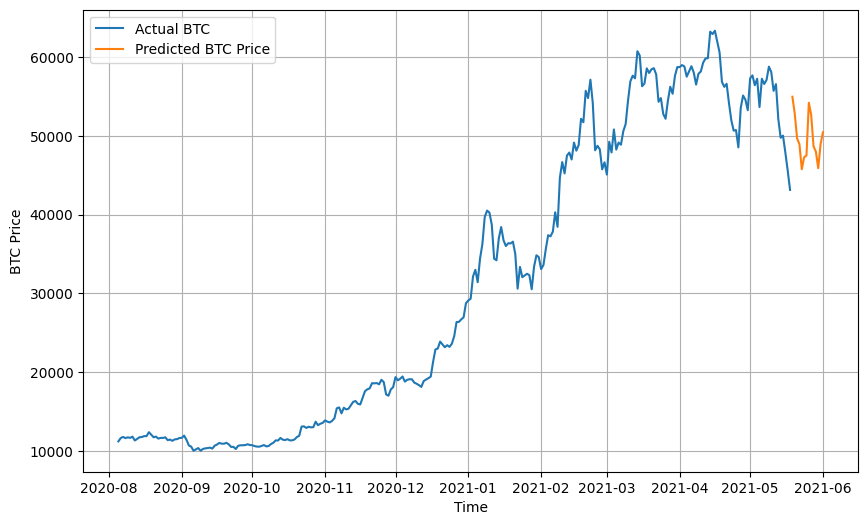

In [1830]:
plt.figure(figsize=(10,6))
plot_time_series(bitcoin_prices_windowed.index, bitcoin_prices_windowed.Price, '-', label= 'Actual BTC', start=2500)
plot_time_series(next_time_steps, future_forcast, '-', label= 'Predicted BTC Price')
plt.grid()


In [1831]:
bitcoin_prices_windowed.index.shape

(2787,)

In [1832]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [1833]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps= np.insert(next_time_steps, 0, last_time_step)
future_forcast= np.insert(future_forcast, 0, bitcoin_prices_windowed.Price.iloc[-1])
next_time_steps, future_forcast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54965.777, 52823.01 , 49671.004, 48957.023, 45765.55 ,
        47294.605, 47513.023, 54206.96 , 52650.473, 48676.285, 48004.98 ,
        45900.08 , 48955.496, 50456.918], dtype=float32))

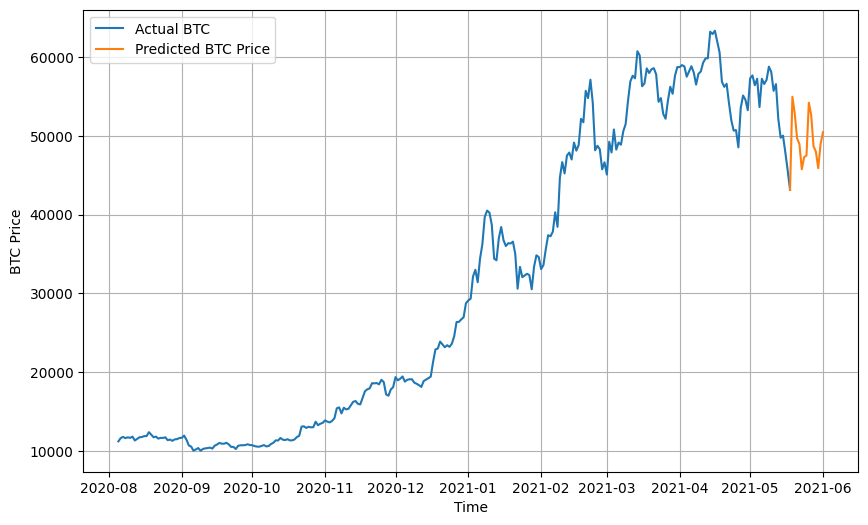

In [1834]:
plt.figure(figsize=(10,6))
plot_time_series(bitcoin_prices_windowed.index, bitcoin_prices_windowed.Price, '-', label= 'Actual BTC', start=2500)
plot_time_series(next_time_steps, future_forcast, '-', label= 'Predicted BTC Price')
plt.grid()


## Model 10: Why forcasting is BS (the black swan/turky problem)

In [1901]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey= btc_price.copy()
btc_price_turkey[-1]= btc_price_turkey[-1]/100 

In [1952]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [1953]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [1856]:
btc_timesteps_turkey= np.array(bitcoin_prices.index)
btc_timesteps_turkey[-5:]

array(['2021-05-14T00:00:00.000000000', '2021-05-15T00:00:00.000000000',
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

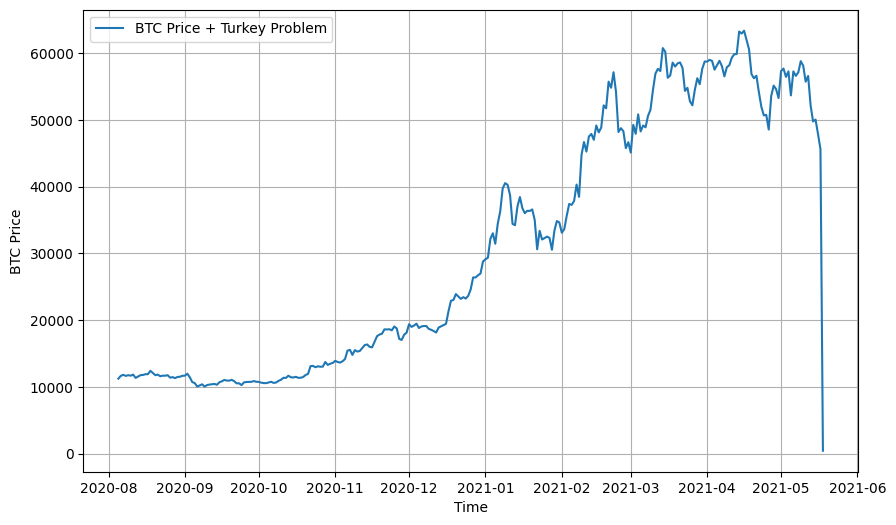

In [1857]:
plt.figure(figsize=(10,6))
plot_time_series(btc_timesteps_turkey, btc_price_turkey, '-', start=2500, label='BTC Price + Turkey Problem')

In [1858]:
WINDOW_SIZE=7
HORIZON=1

In [1890]:
# Create train and test sets for turkey problem data
full_windows, full_labels= make_windows(np.array(btc_price_turkey), window_size= WINDOW_SIZE, horizon= HORIZON)
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [1891]:
type(btc_price)

list

In [1892]:
X_train, X_test, y_train, y_test= make_train_test_splits(full_windows, full_labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [1893]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,308 (9.02 KB)

### Build a turkey model (model to predict on turkey data)

In [1894]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model= tf.keras.models.clone_model(model_1)
turkey_model.name='model_10_turkey'

turkey_model.compile(loss='mae',
                    optimizer='adam')

history_model_6_10= turkey_model.fit(X_train, y_train,
                                    epochs= 100,
                                    batch_size= 128,
                                    validation_data=(X_test, y_test),
                                    callbacks= [create_model_checkpoint(model_name= turkey_model.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1616.0344 - val_loss: 2698.0171
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 288.3790 - val_loss: 999.7234
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 162.7511 - val_loss: 879.3524
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 141.5509 - val_loss: 908.9450
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 138.8895 - val_loss: 848.3237
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134.6610 - val_loss: 840.6838
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132.3268 - val_loss: 820.8297
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 130.3398 - val_loss: 805.9627
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128.4073 - val_loss: 796.7910
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 126.8105 - val_loss: 785.6927
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.3993 - val_loss: 773.0076
Epoch 12/100
18

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.9060 - val_loss: 651.2032
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.2618 - val_loss: 650.0890
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.4096 - val_loss: 650.1762
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.5831 - val_loss: 648.3157
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.3736 - val_loss: 657.8600
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.4283 - val_loss: 648.5336
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.1222 - val_loss: 646.6322
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.8951 - val_loss: 646.6746
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.7034 - val_loss: 650.9037
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.4665 - val_loss: 646.3275
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.4380 - val_loss: 653.6161
Epoch 78/100
18/18 ━━━━

In [1895]:
turkey_model.name

'model_1_dense'

In [1896]:
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 291.6470 


645.4105224609375

In [1897]:
turkey_model= tf.keras.models.load_model('model_checkpoints/model_10_turkey.keras')
turkey_model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 290.3065  


639.9011840820312

In [1898]:
turkey_preds= make_pred(turkey_model, X_test)
turkey_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8857.009, 8797.07 , 9045.869, 8795.37 , 8755.279], dtype=float32)>

In [1899]:
turkey_results= evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 639.9011,
 'mse': 4854760.0,
 'rmse': 639.9011,
 'mape': 21.475374,
 'mase': 26.518112}

In [1900]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

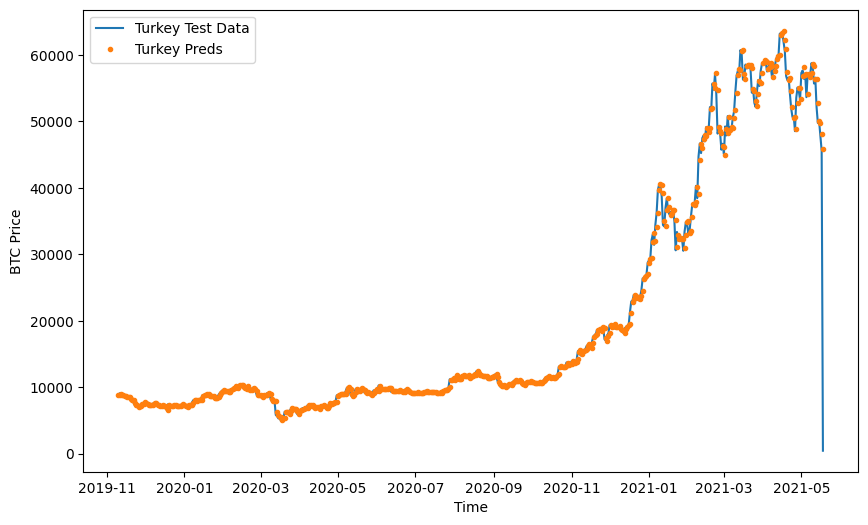

In [1926]:
plt.figure(figsize=(10,6))
offset=0

plot_time_series(btc_timesteps_turkey[-len(X_test):],
                 btc_price_turkey[-len(X_test):],
                 '-',
                 start= offset,
                 label= 'Turkey Test Data')

plot_time_series(btc_timesteps_turkey[-len(X_test):],
                turkey_preds,
                start= offset,
                label='Turkey Preds')

In [1905]:
y_test.shape

(556, 1)

In [1918]:
len(X_test)

/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


556

In [1919]:
len(btc_price_turkey)

2787

## Compae models

In [1927]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)           

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.746399,1164587.625,1079.160645,2.535758,0.999130
model_2_dense_w30_h1,603.843079,1276728.125,1129.923950,2.751967,1.055524
model_3_dense_w30_h7,833.476013,2196432.000,865.550476,4.031177,1.454707
model_4_CONV1D,573.142883,1185085.375,1088.616211,2.560408,1.006853
model_5_LSTM,573.755310,1186509.375,573.755310,2.578012,30.082026
model_6_multivariate,567.131653,1167876.625,1080.683350,2.531820,0.996293
model_7_NBEATS,571.150757,1158088.375,1076.145142,2.590305,1.003354
model_8_ensemble,569.815674,1145324.875,1070.198486,2.570765,1.001008
model_10_turkey,639.901123,4854760.000,639.901123,21.475374,26.518112


<Axes: >

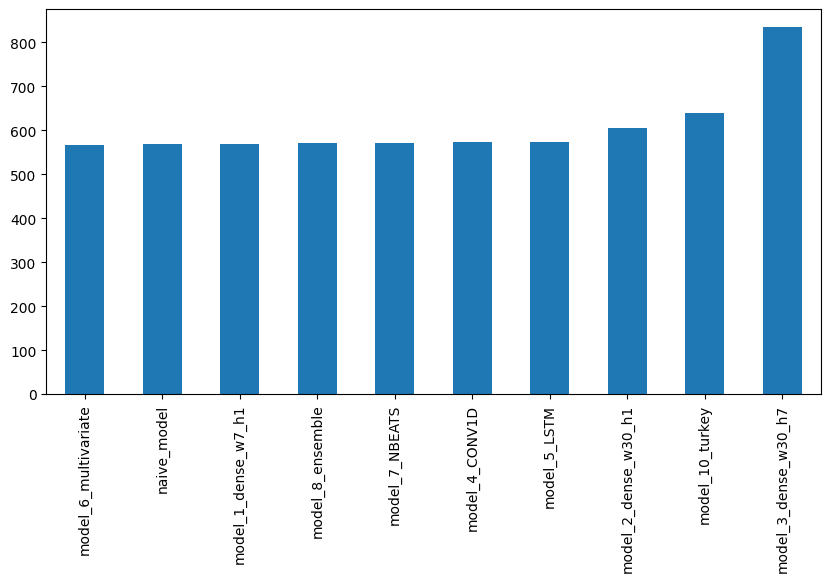

In [1949]:
# Sort model results by MAE and plot them
model_results.mae.sort_values().plot(figsize=(10,5), kind='bar')